In [3]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [4]:
stdfield = pd.read_csv('Standard_Fielding_Table3.csv', float_precision = 'round_trip')

In [5]:
stdfield.head()

,Year,Tm,#Fld,RA/G,DefEff,G,GS,CG,Inn,Ch,...,A,E,DP,Fld%,Rtot,Rtot/yr,Rdrs,Rdrs/yr,Rgood,Playoff
0,2000,Arizona Diamondbacks,64,5.51,0.685,162,1458,1030,12756.0,5726,...,1374,100,113,0.983,-16,-2,-37,0,-1,0
1,2000,Atlanta Braves,55,4.07,0.708,161,1449,1126,12696.0,5786,...,1483,71,104,0.988,56,5,50,1,5,1
2,2000,Baltimore Orioles,62,5.90,0.683,162,1458,1093,12618.0,5639,...,1359,74,101,0.987,-48,-5,-30,-1,-12,0
3,2000,Boston Red Sox,56,4.62,0.659,162,1458,1104,12771.0,5786,...,1421,108,143,0.981,-66,-6,4,-1,-1,0
4,2000,Chicago Cubs,68,5.18,0.691,162,1458,1039,12714.0,5879,...,1554,87,149,0.985,-25,-2,29,0,5,0


In [6]:
stdfield.info()
#all rows filled, no problematic types?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     660 non-null    int64  
 1   Tm       660 non-null    object 
 2   #Fld     660 non-null    int64  
 3   RA/G     660 non-null    float64
 4   DefEff   660 non-null    float64
 5   G        660 non-null    int64  
 6   GS       660 non-null    int64  
 7   CG       660 non-null    int64  
 8   Inn      660 non-null    float64
 9   Ch       660 non-null    int64  
 10  PO       660 non-null    int64  
 11  A        660 non-null    int64  
 12  E        660 non-null    int64  
 13  DP       660 non-null    int64  
 14  Fld%     660 non-null    float64
 15  Rtot     660 non-null    int64  
 16  Rtot/yr  660 non-null    int64  
 17  Rdrs     660 non-null    int64  
 18  Rdrs/yr  660 non-null    int64  
 19  Rgood    660 non-null    int64  
 20  Playoff  660 non-null    int64  
dtypes: float64(4), i

In [8]:
pd.Series.replace(stdfield.Playoff, to_replace = 0, value = 'No', inplace = True)
pd.Series.replace(stdfield.Playoff, to_replace = 1, value = 'Yes', inplace = True)
stdfield.Playoff = stdfield.Playoff.astype('category')
stdfield.Playoff.head()

0     No
1    Yes
2     No
3     No
4     No
Name: Playoff, dtype: category
Categories (2, object): ['No', 'Yes']

In [9]:
stdfield = stdfield.loc[stdfield.Year != 2020, ]
print(stdfield.shape)

(630, 21)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

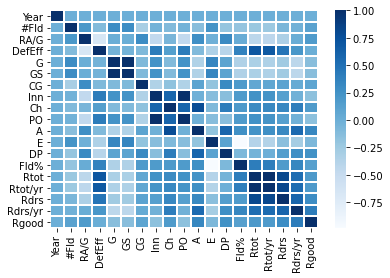

In [11]:
sns.heatmap(stdfield.corr(), cmap = "Blues", linecolor = "white", linewidths = 1);

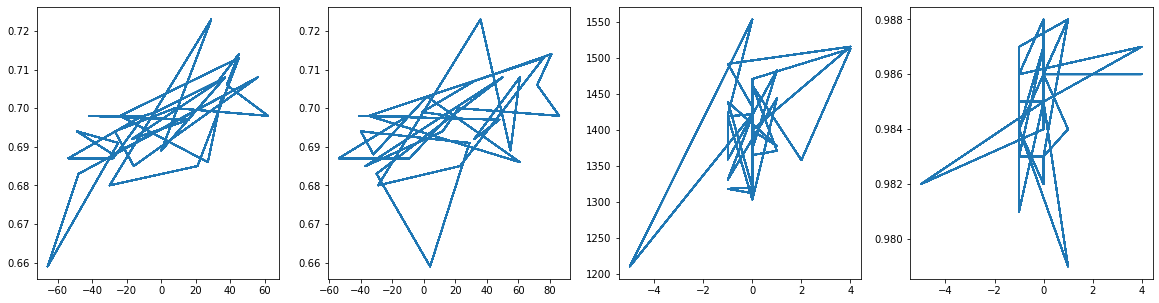

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
ax1.plot(stdfield['Rtot'], stdfield['DefEff'])
ax2.plot(stdfield['Rdrs'], stdfield['DefEff'])
ax3.plot(stdfield['Rdrs/yr'], stdfield['A'])
ax4.plot(stdfield['Rdrs/yr'], stdfield['Fld%'])

plt.show();

Text(0, 0.5, 'Defensive Chances')

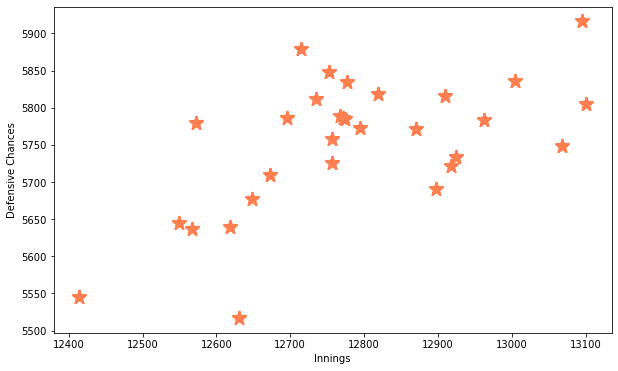

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(stdfield.Inn, stdfield.Ch, marker = "*", s = 200, c = "coral")
ax.set_xlabel('Innings')
ax.set_ylabel('Defensive Chances')

Text(0.5, 0, 'Assists')

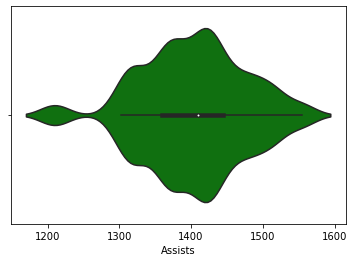

In [31]:
ax = sns.violinplot(x=stdfield.A, color = 'green', scale = 'width')
ax.set_xlabel('Assists')


Text(0.5, 0, 'Number of Players as Fielders')

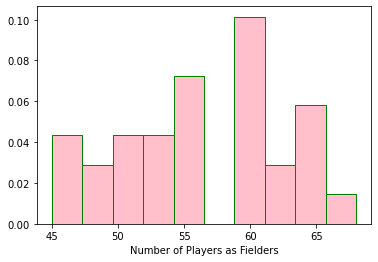

In [39]:
plt.hist(stdfield['#Fld'], facecolor = "pink", edgecolor = "green", density = True)
plt.xlabel("Number of Players as Fielders")

Random Forests and Logistic Regression